In [3]:
import numpy as np
import pandas as pd
import time
import sys
import os
import h5py
from joblib import Parallel, delayed
sys.path.append('../')
from packages import actv_analysis, svm, load_csv, stats, objects, test_codes
import pickle
import re
import glob
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [4]:
# Get the current directory
current_dir = os.getcwd()

# Go two directories up
up_two_dir = os.path.dirname(current_dir)

print(up_two_dir)

/Users/dongillee/Interference/codes


In [6]:
net=1; relu=4; epoch=0
pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
with open(pkl_filename, 'rb') as f:
    units = pickle.load(f)

In [11]:
actv_net = actv_analysis.get_actv_net(net=net, relu=4, epoch=0)

--- 107.34171104431152 seconds ---


In [15]:
units_nonzero = [units[i].id for i in range(len(units)) if units[i].no_response_subset is not True]
units_sample = random.sample(units_nonzero, 200)

In [18]:
avg_actv_net = np.mean(actv_net, axis=2)

In [34]:
avg_actv_net_nxs = avg_actv_net.reshape(actv_net.shape[0],10,10)[units_sample,1:,3:]

In [38]:
aoi = np.mean(avg_actv_net_nxs,axis=0)

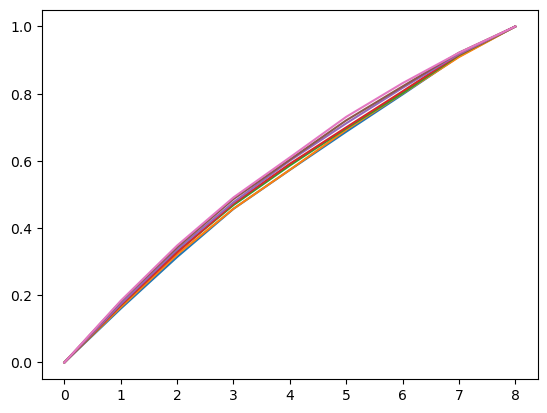

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Assuming aoi is a 2D numpy array
aoi_normalized = scaler.fit_transform(aoi)

for i in range(7):
    sns.lineplot(x=range(aoi_normalized.shape[0]), y=aoi_normalized[:,i])

plt.show()

In [29]:
aoi = np.mean(avg_actv_net_nxs, axis=0)

--- 107.61422896385193 seconds ---


/Users/dongillee/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


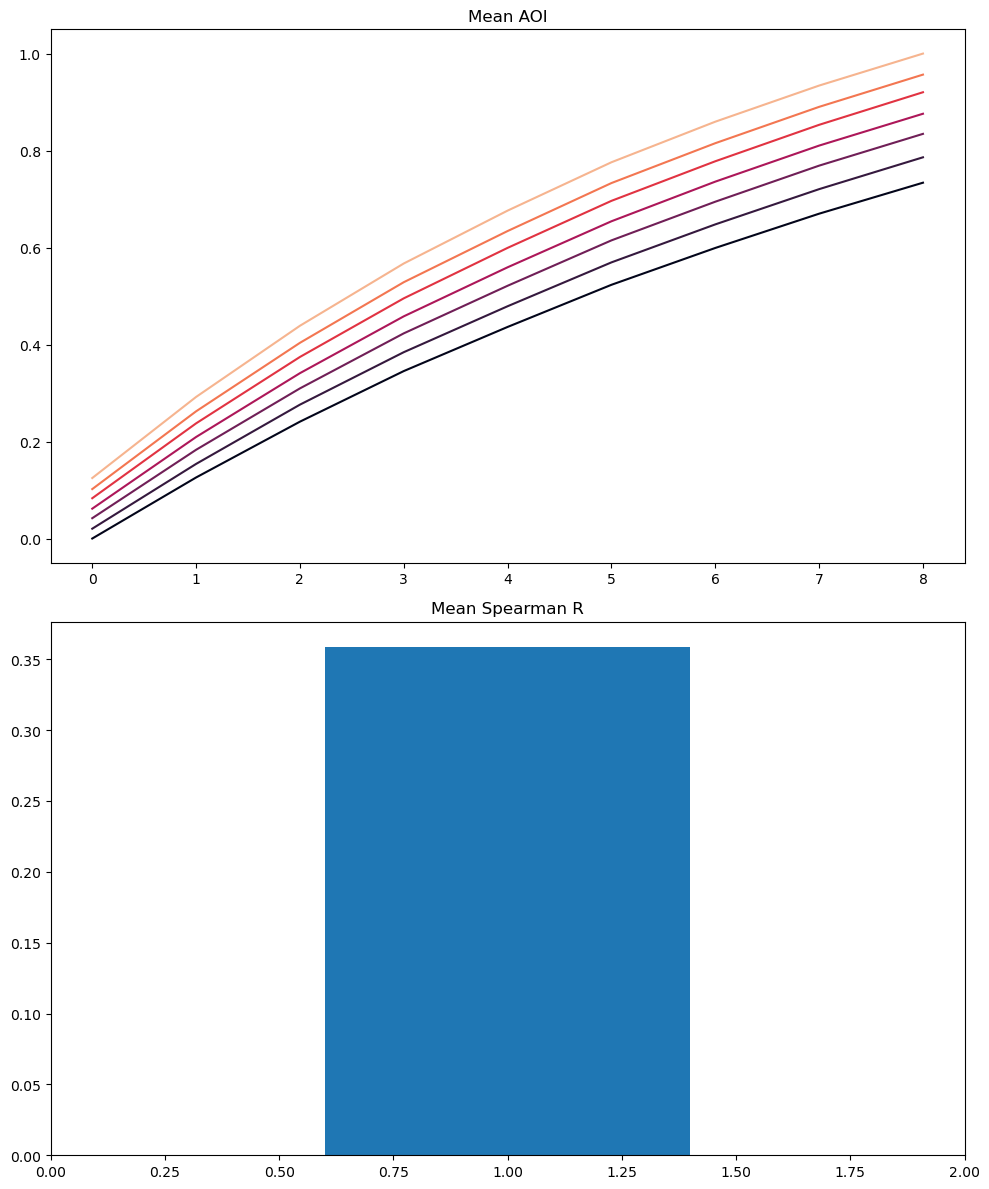

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy import stats
import random
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

nets = np.arange(1,2)
epoch = 0
relu = 4

aois = []
spearman_results = []  # new list to store Spearman R results

for net in nets:
    pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
    with open(pkl_filename, 'rb') as f:
        units = pickle.load(f)
    units_nonzero = [units[i].id for i in range(len(units)) if units[i].no_response_subset is not True]
    units_sample = random.sample(units_nonzero, 2000)

    actv_net = actv_analysis.get_actv_net(net=net, relu=4, epoch=0)
    avg_actv_net = np.mean(actv_net, axis=2)
    avg_actv_net_nxs = avg_actv_net.reshape(actv_net.shape[0],10,10)[units_nonzero,1:,3:]
    aoi = np.mean(avg_actv_net_nxs,axis=0)
    aois.append(aoi)

    # Calculate Spearman R for this net
    spearman_r = np.zeros((avg_actv_net_nxs.shape[0], avg_actv_net_nxs.shape[2]))
    for i in range(avg_actv_net_nxs.shape[0]):
        for j in range(avg_actv_net_nxs.shape[2]):
            spearman_r[i, j] = stats.spearmanr(np.arange(avg_actv_net_nxs.shape[1]), avg_actv_net_nxs[i, :, j])[0]
    # Append the results to the list
    spearman_results.append(spearman_r)

aois = np.array(aois)
spearman_results = np.array(spearman_results)  # Convert the results list to an array

# Reshape aois for MinMaxScaler
aois_reshaped = aois.reshape(-1, 1)

# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform aois with the scaler
aois_normalized = scaler.fit_transform(aois_reshaped)

# Reshape aois back to its original shape
aois_normalized = aois_normalized.reshape(aois.shape)

# Calculate the mean and the confidence interval
mean_aoi = np.mean(aois_normalized, axis=0)

# Calculate the mean Spearman R for each item in the third dimension
mean_spearman_r = np.mean(spearman_results, axis=0)

# Calculate the overall mean Spearman R
overall_mean_spearman_r = np.nanmean(mean_spearman_r)

# Plotting
fig, axs = plt.subplots(2, figsize=(10, 12))

# Plot mean AOI
axs[0].set_title('Mean AOI')
cmap = plt.get_cmap('rocket')
for i in range(aois_normalized.shape[2]):
    # Get a color from the colormap
    color = cmap(i/aois_normalized.shape[2])
    axs[0].plot(np.arange(aois_normalized.shape[1]), mean_aoi[:, i], color=color)

# Plot mean Spearman R as a single bar
axs[1].set_title('Mean Spearman R')
axs[1].bar(1, overall_mean_spearman_r)  # A single bar centered at x = 1
axs[1].set_xlim(0, 2)  # Optional: adjust x limits to better frame the bar

plt.tight_layout()
plt.show()

--- 118.15306496620178 seconds ---
--- 119.61209011077881 seconds ---
--- 118.46844387054443 seconds ---
--- 113.93811917304993 seconds ---
--- 116.40329885482788 seconds ---
--- 120.1194519996643 seconds ---
--- 120.22651314735413 seconds ---
--- 115.81343007087708 seconds ---
--- 116.35082006454468 seconds ---
--- 119.79962801933289 seconds ---


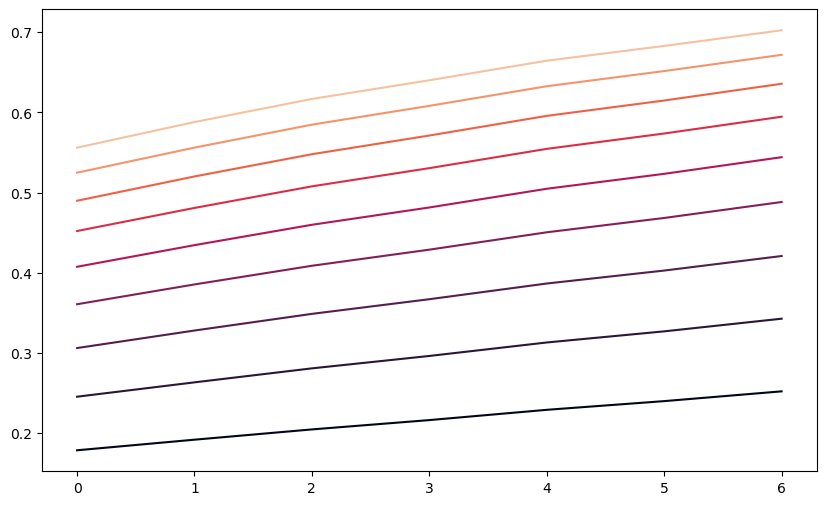

In [21]:
from sklearn.preprocessing import MinMaxScaler

nets = np.arange(1,11)
epoch = 0
relu = 4

aois = []

for net in nets:
    pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
    with open(pkl_filename, 'rb') as f:
        units = pickle.load(f)
    units_nonzero = [units[i].id for i in range(len(units)) if units[i].no_response_subset is not True]
    units_sample = random.sample(units_nonzero, 2000)

    actv_net = actv_analysis.get_actv_net(net=net, relu=4, epoch=0)
    avg_actv_net = np.mean(actv_net, axis=2)
    avg_actv_net_nxs = avg_actv_net.reshape(actv_net.shape[0],10,10)[units_nonzero,1:,3:]
    aoi = np.mean(avg_actv_net_nxs,axis=0)
    aois.append(aoi)

aois = np.array(aois)

# Reshape aois for MinMaxScaler
aois_reshaped = aois.reshape(-1, 1)

# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform aois with the scaler
aois_normalized = scaler.fit_transform(aois_reshaped)

# Reshape aois back to its original shape
aois_normalized = aois_normalized.reshape(aois.shape)

# Calculate the mean and the confidence interval
mean_aoi = np.mean(aois_normalized, axis=0)

# Plotting
plt.figure(figsize=(10, 6))

# Define the colormap
cmap = plt.get_cmap('rocket')

for i in range(aois_normalized.shape[1]):
    # Get a color from the colormap
    color = cmap(i/aois_normalized.shape[1])

    sns.lineplot(x=np.arange(aois_normalized.shape[2]), y=mean_aoi[i, :], color=color)

plt.savefig(f'lineplot_tuning_curve_relu{relu}_epoch{epoch}_size_xaxis.pdf')
plt.show()

In [80]:
net=1
relu=4
epoch=0

#net=1; relu=4; epoch=0
pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
with open(pkl_filename, 'rb') as f:
    units = pickle.load(f)
    
# Create a dictionary with your data
data = {
    'spearman_number': [units[i].spearmanr_number for i in range(len(units))],
    'spearman_size': [units[i].spearmanr_size for i in range(len(units))],
}

# Convert the dictionary to a DataFrame
df0 = pd.DataFrame(data).dropna()


net=1
relu=4
epoch=90

#net=1; relu=4; epoch=0
pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
with open(pkl_filename, 'rb') as f:
    units = pickle.load(f)
    
# Create a dictionary with your data
data = {
    'spearman_number': [units[i].spearmanr_number for i in range(len(units))],
    'spearman_size': [units[i].spearmanr_size for i in range(len(units))],
}

# Convert the dictionary to a DataFrame
df90 = pd.DataFrame(data).dropna()

/var/folders/yq/vnn1qzt56k7041vctbsfrxj40000gn/T/ipykernel_3261/3261931474.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


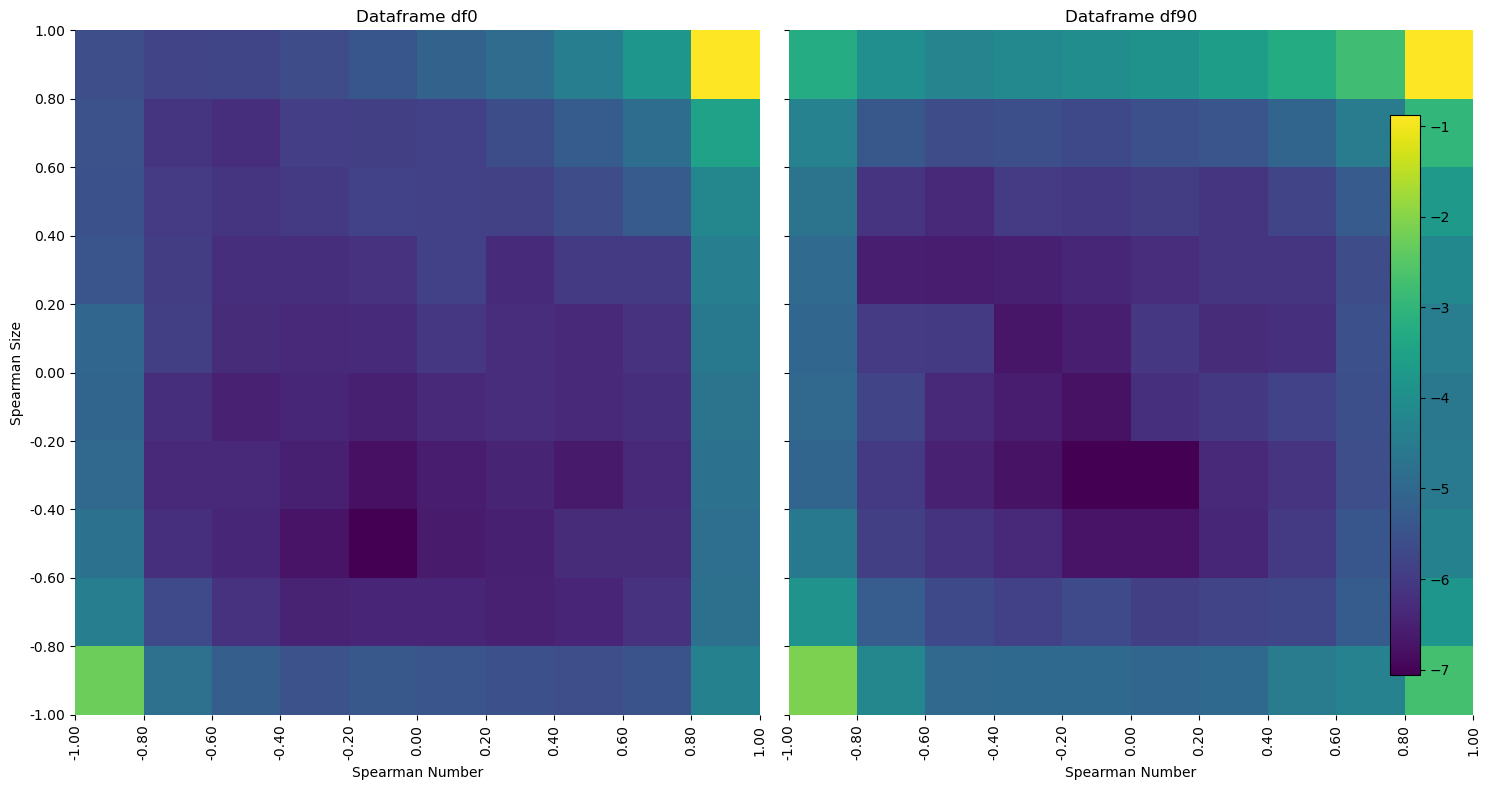

In [112]:
import matplotlib.gridspec as gridspec

def compute_log_hist(df):
    # Create weights for the dataframe
    weights = np.ones_like(df['spearman_number']) / len(df['spearman_number'])
    
    # Number of bins
    bins_num = 10
    
    # Compute bin edges for x and y
    x_bins = np.histogram_bin_edges(df['spearman_number'], bins=bins_num)
    y_bins = np.histogram_bin_edges(df['spearman_size'], bins=bins_num)
    
    # Calculate the 2D histogram
    hist_data, x_edges, y_edges = np.histogram2d(df['spearman_number'], df['spearman_size'], bins=[x_bins, y_bins], weights=weights)
    
    # Transform the data using log (add a small constant to avoid log(0))
    log_hist_data = np.log(hist_data + 1e-10)  # adding 1e-10 to avoid taking log(0)
    
    return log_hist_data, x_bins, y_bins


# Calculate the histograms for both dataframes
log_hist_data0, x_bins0, y_bins0 = compute_log_hist(df0)
log_hist_data90, x_bins90, y_bins90 = compute_log_hist(df90)

# Determine common colorbar limits
vmin = min(log_hist_data0.min(), log_hist_data90.min())
vmax = max(log_hist_data0.max(), log_hist_data90.max())

cmap = plt.get_cmap('viridis')
cmap.set_bad(cmap(0))

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), sharey=True)

# Plot the heatmap for df0, ensure data is flipped along the vertical axis
sns.heatmap(np.flipud(log_hist_data0.T), ax=ax0, cmap=cmap, cbar=False, xticklabels=False, yticklabels=False)

# Plot the heatmap for df90, ensure data is flipped along the vertical axis
sns.heatmap(np.flipud(log_hist_data90.T), ax=ax1, cmap=cmap, cbar=False, xticklabels=False, yticklabels=False)


# Set ticks to represent the bin edges for both heatmaps
ax0.set_xticks(np.arange(len(x_bins0)))
ax0.set_yticks(np.arange(len(y_bins0)))
ax0.set_xticklabels([f"{edge:.2f}" for edge in x_bins0], rotation=90)
ax0.set_yticklabels(reversed([f"{edge:.2f}" for edge in y_bins0]))  # Reverse the y tick labels
#ax0.invert_yaxis()  # Invert the y-axis for the heatmap

ax1.set_xticks(np.arange(len(x_bins90)))
ax1.set_xticklabels([f"{edge:.2f}" for edge in x_bins90], rotation=90)

# Colorbar settings
cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)

cbar = ax.collections[0].colorbar
log_ticks = np.array([-7, -6, -5, -4, -3, -2], dtype=float)
cbar.set_ticks(log_ticks)
cbar.set_ticklabels(10**log_ticks)

# Add titles and labels
ax0.set_title('Dataframe df0')
ax1.set_title('Dataframe df90')
ax0.set_xlabel('Spearman Number')
ax0.set_ylabel('Spearman Size')
ax1.set_xlabel('Spearman Number')

plt.tight_layout()
plt.show()

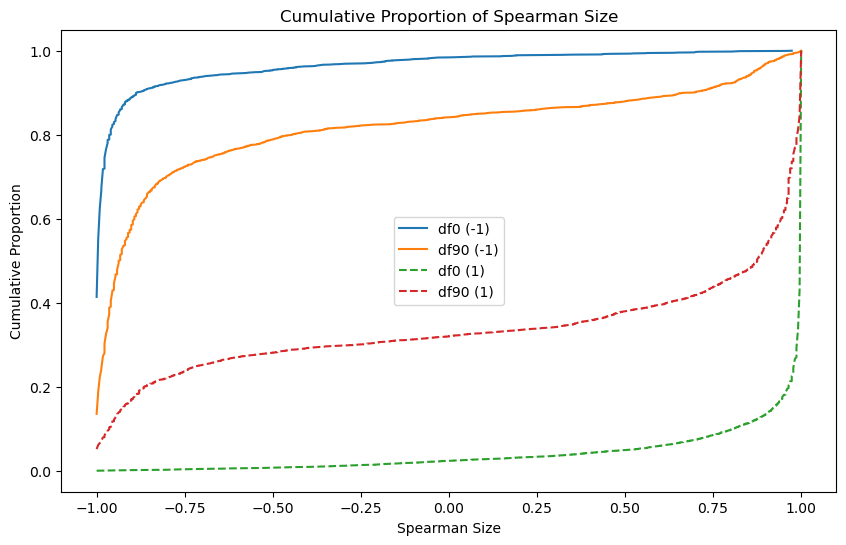

In [122]:
def compute_cumulative_proportion(df, spearman_number_value):
    # Filter dataframe
    df_filtered = df[df['spearman_number'] == spearman_number_value]

    # Sort by spearman_size
    df_sorted = df_filtered.sort_values(by='spearman_size')

    # Compute cumulative proportion
    cumulative_counts = df_sorted['spearman_size'].value_counts().sort_index().cumsum()
    df_cumulative = pd.DataFrame({
        'spearman_size': cumulative_counts.index,
        'cumulative_proportion': cumulative_counts.values / len(df_filtered)
    })
    
    return df_cumulative

# Compute cumulative proportions for both dataframes for spearman_number = -1
df0_cumulative_minus1 = compute_cumulative_proportion(df0, -1)
df90_cumulative_minus1 = compute_cumulative_proportion(df90, -1)

# Compute cumulative proportions for both dataframes for spearman_number = 1
df0_cumulative_plus1 = compute_cumulative_proportion(df0, 1)
df90_cumulative_plus1 = compute_cumulative_proportion(df90, 1)

# Plotting
plt.figure(figsize=(10,6))

# Plots for spearman_number = -1
plt.plot(df0_cumulative_minus1['spearman_size'], df0_cumulative_minus1['cumulative_proportion'], linestyle='-', label='df0 (-1)')
plt.plot(df90_cumulative_minus1['spearman_size'], df90_cumulative_minus1['cumulative_proportion'], linestyle='-', label='df90 (-1)')

# Plots for spearman_number = 1
plt.plot(df0_cumulative_plus1['spearman_size'], df0_cumulative_plus1['cumulative_proportion'], linestyle='--', label='df0 (1)')
plt.plot(df90_cumulative_plus1['spearman_size'], df90_cumulative_plus1['cumulative_proportion'], linestyle='--', label='df90 (1)')

plt.xlabel('Spearman Size')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Proportion of Spearman Size')
plt.legend()
plt.show()


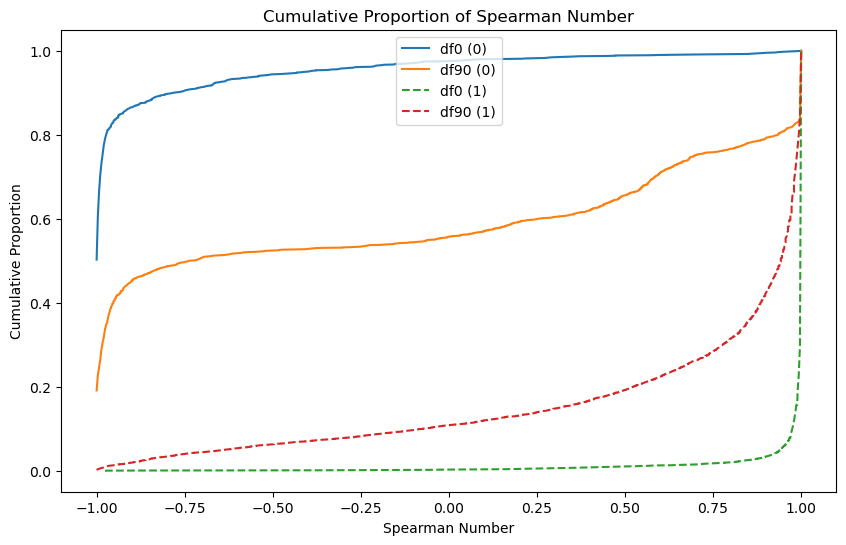

In [124]:
def compute_cumulative_proportion_number_axis(df, spearman_size_value):
    # Filter dataframe
    df_filtered = df[df['spearman_size'] == spearman_size_value]

    # Sort by spearman_number
    df_sorted = df_filtered.sort_values(by='spearman_number')

    # Compute cumulative proportion
    cumulative_counts = df_sorted['spearman_number'].value_counts().sort_index().cumsum()
    df_cumulative = pd.DataFrame({
        'spearman_number': cumulative_counts.index,
        'cumulative_proportion': cumulative_counts.values / len(df_filtered)
    })
    
    return df_cumulative

# Compute cumulative proportions for both dataframes for spearman_size = 0
df0_cumulative_0 = compute_cumulative_proportion_number_axis(df0, -1)
df90_cumulative_0 = compute_cumulative_proportion_number_axis(df90, -1)

# Compute cumulative proportions for both dataframes for spearman_size = 1
df0_cumulative_1 = compute_cumulative_proportion_number_axis(df0, 1)
df90_cumulative_1 = compute_cumulative_proportion_number_axis(df90, 1)

# Plotting
plt.figure(figsize=(10,6))

# Plots for spearman_size = 0
plt.plot(df0_cumulative_0['spearman_number'], df0_cumulative_0['cumulative_proportion'], linestyle='-', label='df0 (0)')
plt.plot(df90_cumulative_0['spearman_number'], df90_cumulative_0['cumulative_proportion'], linestyle='-', label='df90 (0)')

# Plots for spearman_size = 1
plt.plot(df0_cumulative_1['spearman_number'], df0_cumulative_1['cumulative_proportion'], linestyle='--', label='df0 (1)')
plt.plot(df90_cumulative_1['spearman_number'], df90_cumulative_1['cumulative_proportion'], linestyle='--', label='df90 (1)')

plt.xlabel('Spearman Number')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Proportion of Spearman Number')
plt.legend()
plt.show()

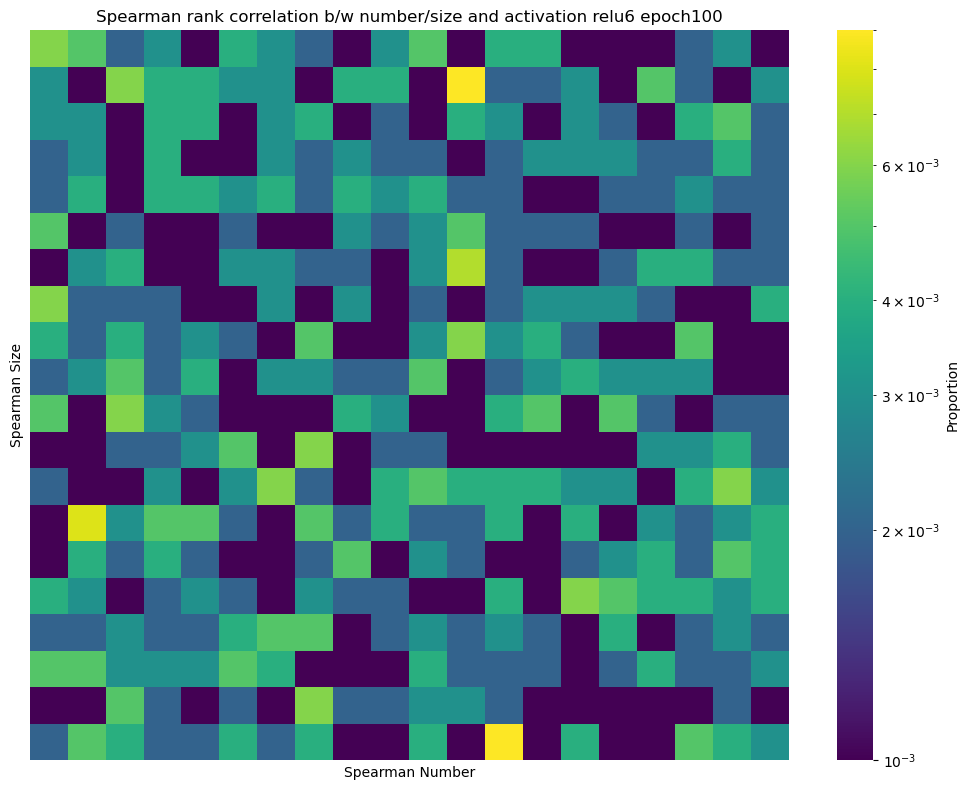

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

# Sample data
np.random.seed(42)
df_nonan = pd.DataFrame({
    'spearman_number': np.random.rand(1000), 
    'spearman_size': np.random.rand(1000)
})

# Create weights for each pair of (spearman_number, spearman_size)
weights = np.ones_like(df_nonan['spearman_number']) / len(df_nonan['spearman_number'])

# Compute 2D histogram
hist, xedges, yedges = np.histogram2d(df_nonan['spearman_number'], df_nonan['spearman_size'], bins=20, weights=weights)

# Create the heatmap, ensuring to apply LogNorm
plt.figure(figsize=(10, 8))
cmap = plt.get_cmap('viridis')
cmap.set_bad(cmap(0))
sns.heatmap(hist.T, cmap=cmap, norm=colors.LogNorm(), cbar_kws={'label': 'Proportion'}, xticklabels=False, yticklabels=False)

# For demonstration purposes
relu, epoch = 6, 100  # Replace with your values

plt.title(f'Spearman rank correlation b/w number/size and activation relu{relu} epoch{epoch}')
plt.xlabel('Spearman Number')
plt.ylabel('Spearman Size')
plt.tight_layout()
plt.savefig(f'Spearman rank correlation bw number_size and activation relu{relu} epoch{epoch}.pdf')
plt.show()
